In [ ]:
#!pip install pandas seaborn statsmodels sklearn openpyxl xlrd geopandas pysal ppscore

In [79]:
# General
import pandas as pd
import os
import scripts
import importlib
import numpy as np
import warnings

# Machine Learnign
## Sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Statmodels
from statsmodels.tools import add_constant
import statsmodels.api as sm

## Others
import ppscore as pps
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

# Geo
import geopandas as gpd
import libpysal
import splot
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from pysal.model import spreg

In [227]:
importlib.reload(scripts)

<module 'scripts' from '/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/scripts.py'>

In [230]:
sns.set_theme()

In [240]:
import json

variables = json.load(open('variables.json', 'r'))

variables_sel = variables['mun_jan']

### Carregar Dados

In [89]:
df_jan = pd.read_csv('dataset/novo/municipio_jan vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_jan.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,878.0,158.06,49.86,10.97,4611.637209,2219580,4904.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,41.0,3421.30,49.91,18.61,4329.077250,817511,2702.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,948.0,7786.52,45.93,13.73,5744.260562,2686612,6393.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,1113.0,3859.35,52.28,14.59,5037.085869,2886698,6872.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,-427.0,1854.12,41.83,14.24,4831.409966,1025360,2205.0,3.382282


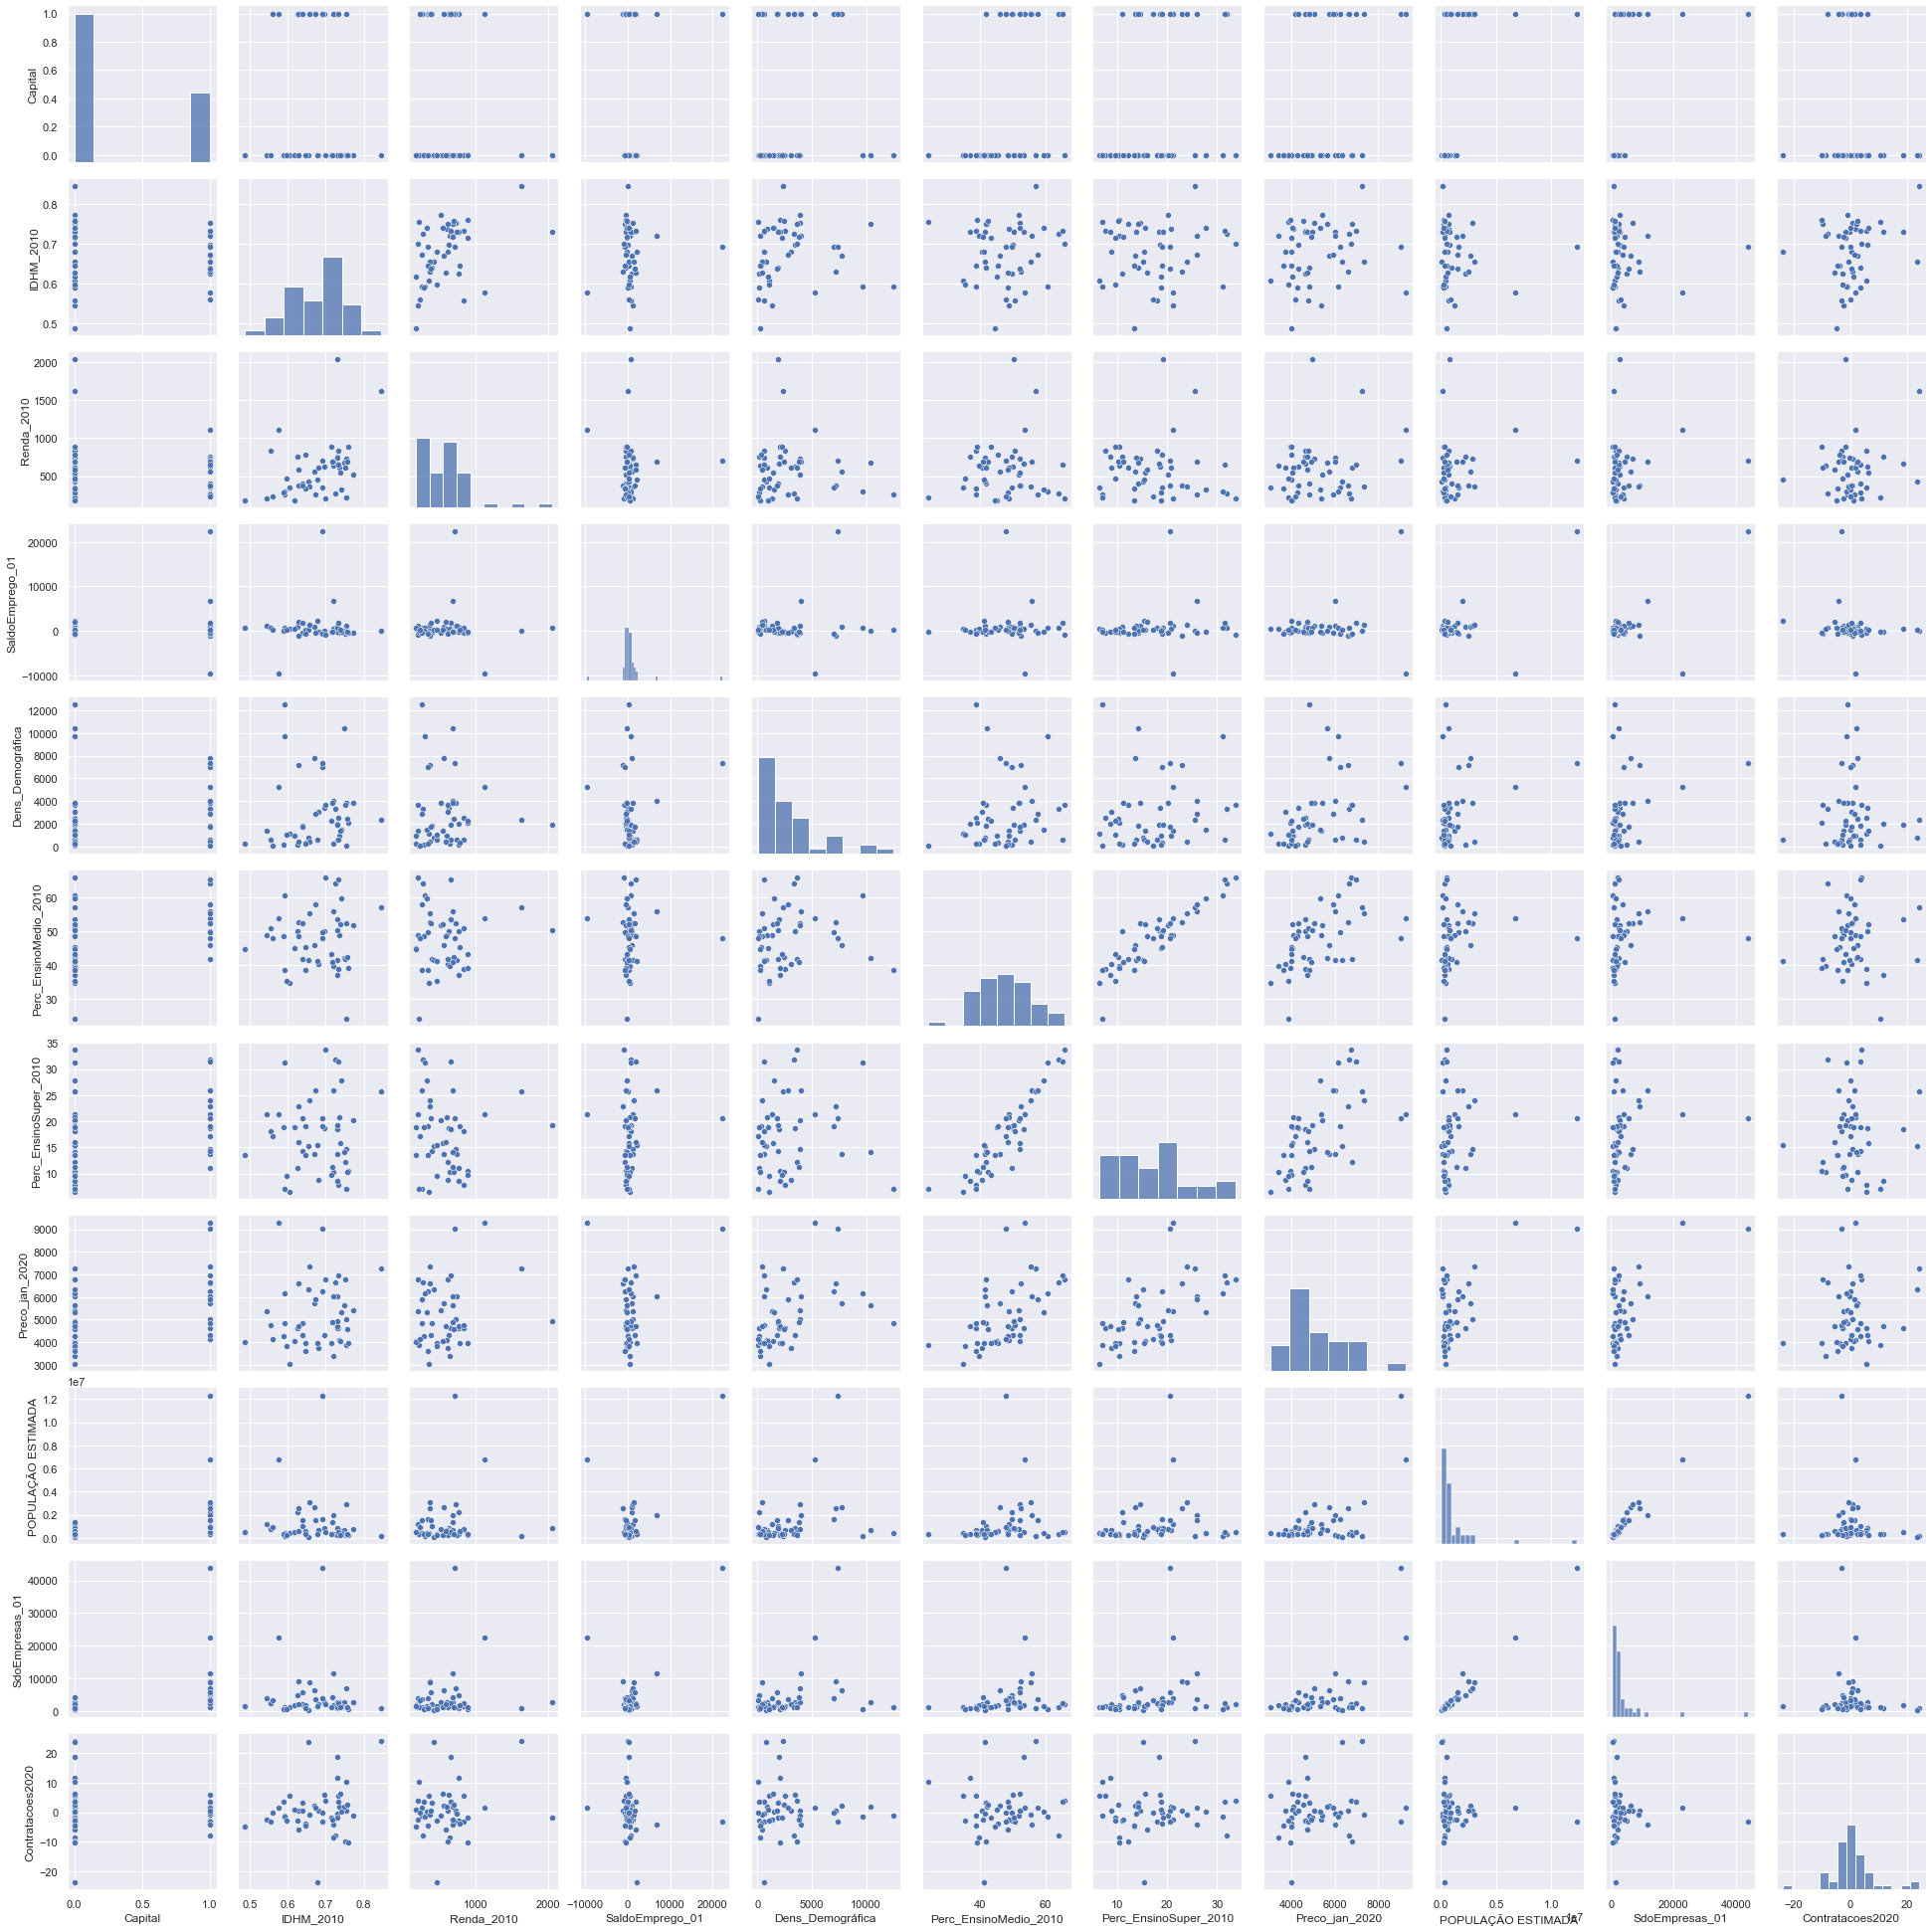

In [231]:
sns.pairplot(df_jan.iloc[:,3:])

plt.show()

In [92]:
df_dez = pd.read_csv('dataset/novo/municipio_dez vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_dez.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_dez_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_12,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,-1451.0,158.06,82218,49.86,10.97,5046.799519,2219580,23234.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,1553.0,3421.30,41879,49.91,18.61,4515.431694,817511,11219.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,1804.0,7786.52,81893,45.93,13.73,5947.932900,2686612,29292.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,523.0,3859.35,109906,52.28,14.59,5210.399506,2886698,33003.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,840.0,1854.12,36320,41.83,14.24,5194.891963,1025360,10293.0,3.382282


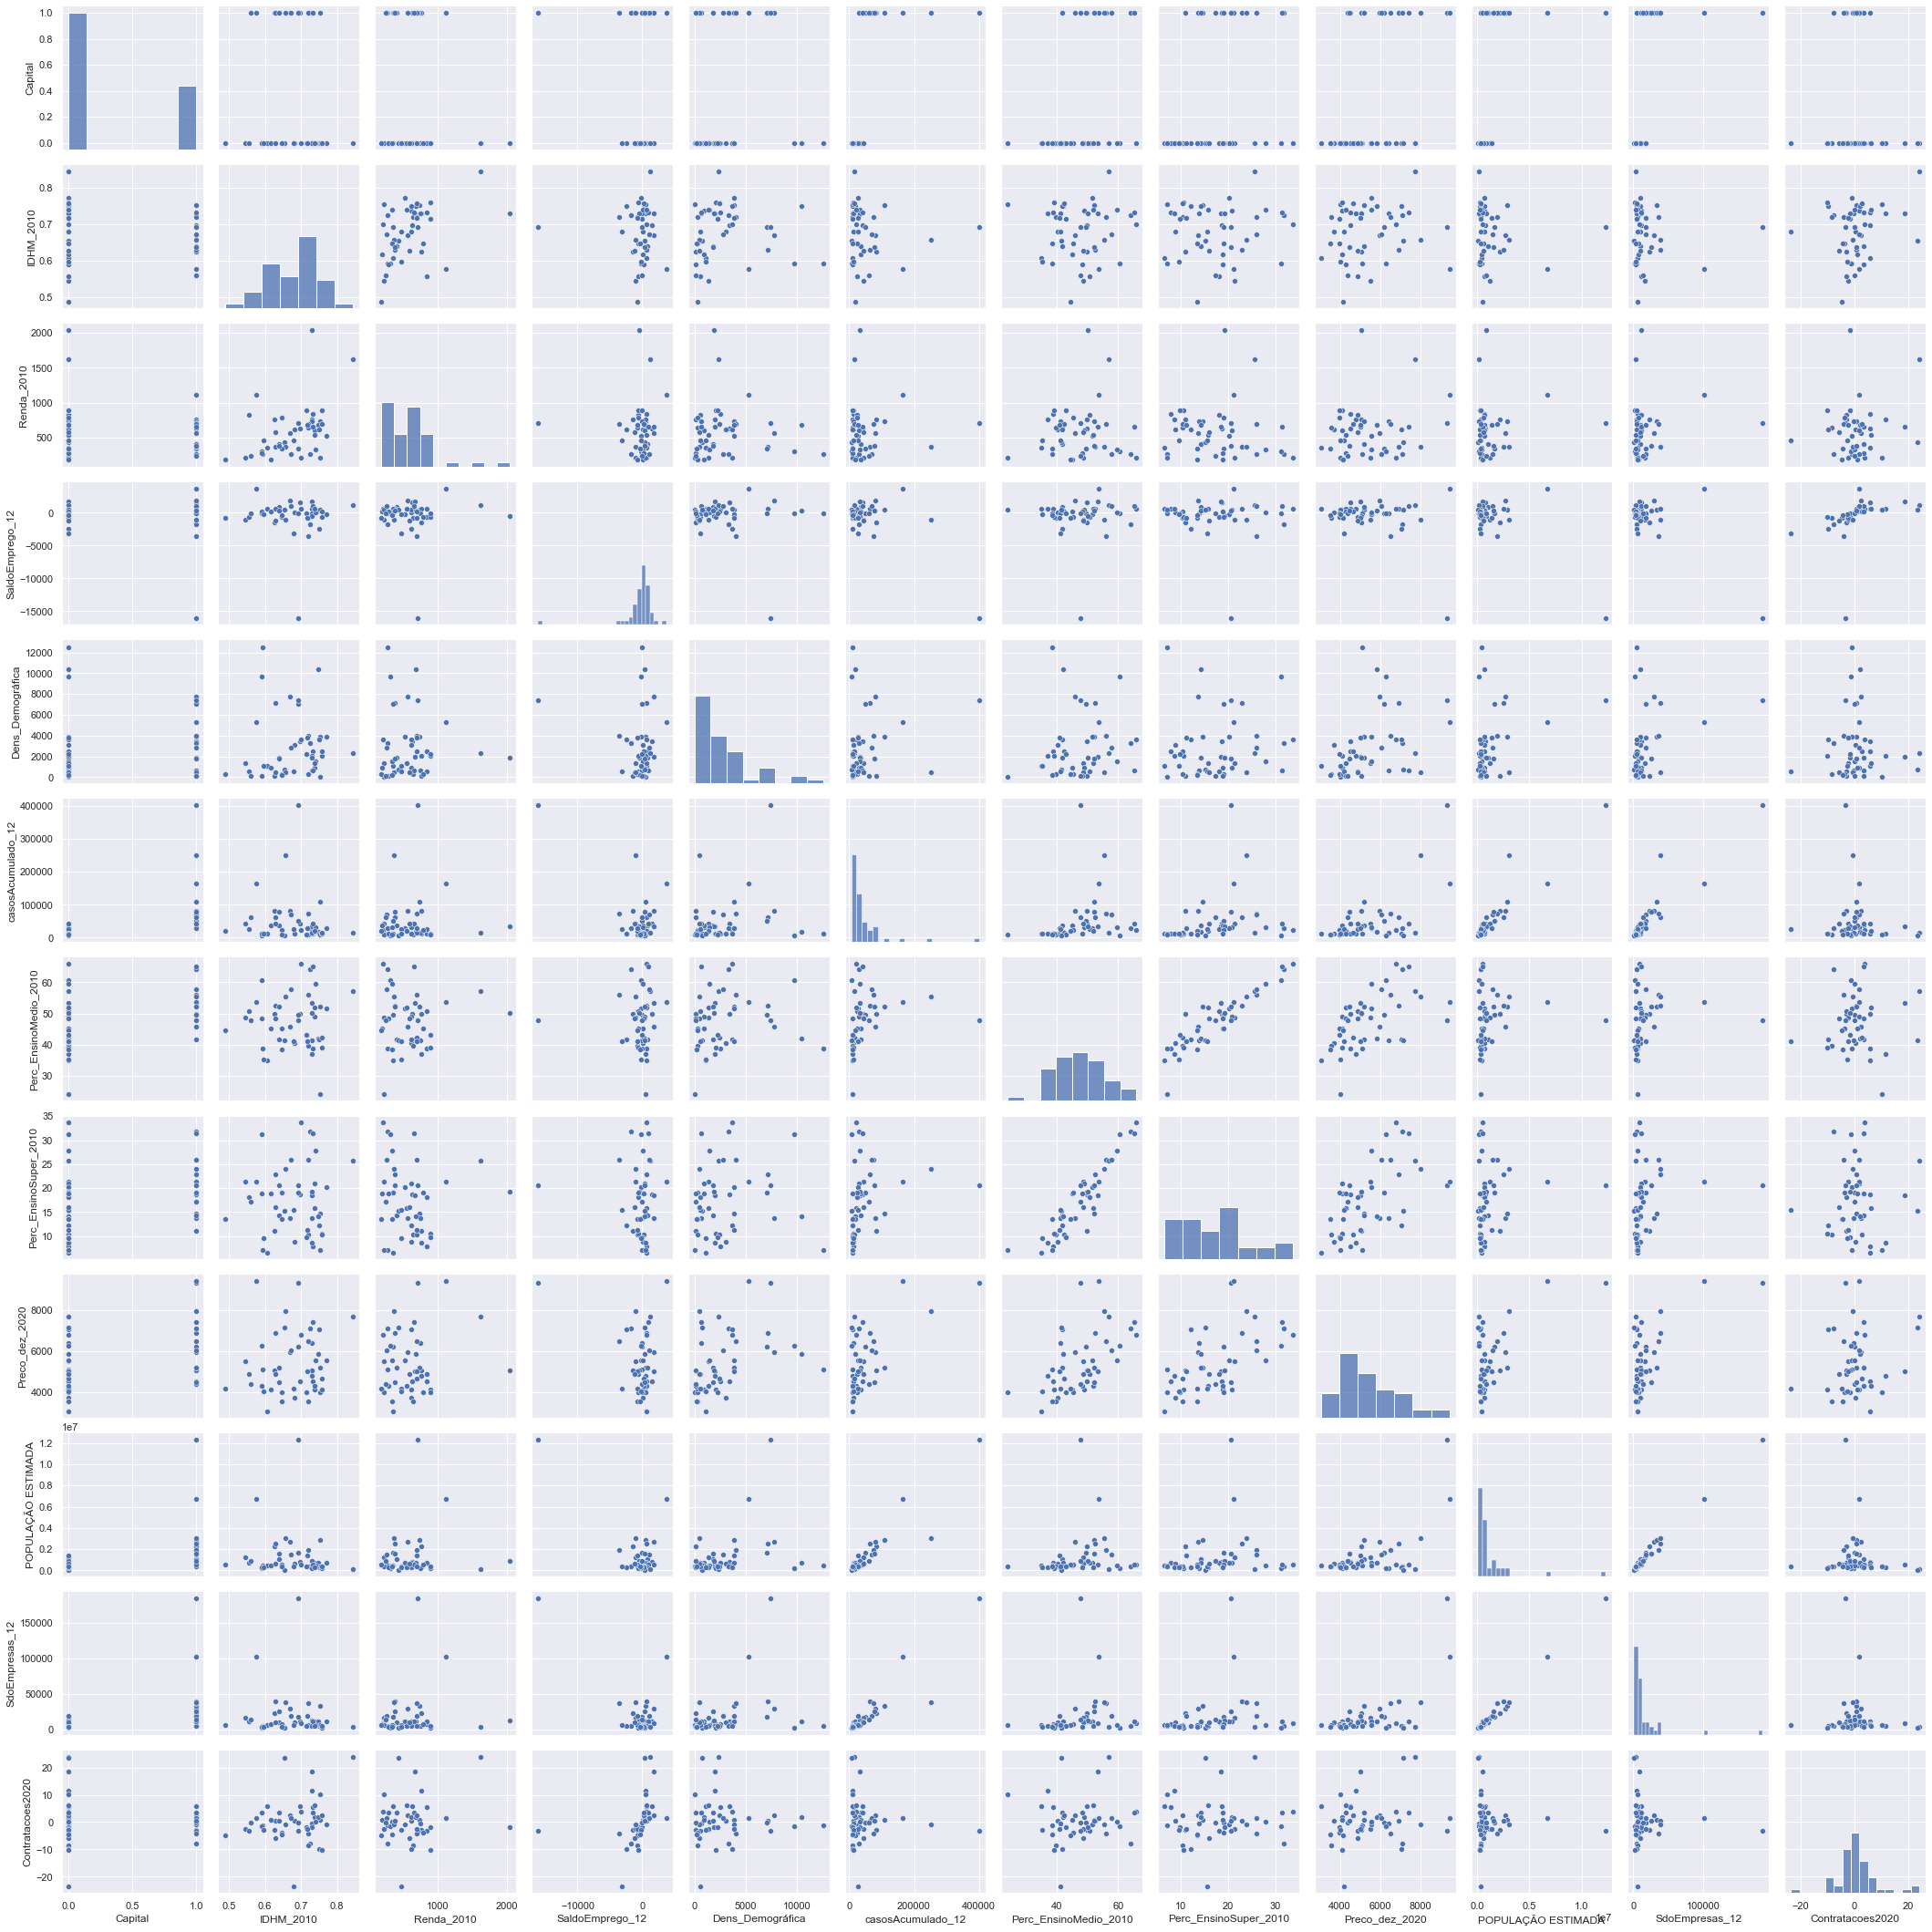

In [232]:
sns.pairplot(df_dez.iloc[:,3:])

plt.show()

In [223]:
df_var = pd.read_csv('dataset/novo/municipio_var vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_var.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,Var_SaldoEmprego,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Variacao_preco,POPULAÇÃO ESTIMADA,SdoEmpresas_var,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,-2329.0,158.06,82218,49.86,10.97,435.162310,2219580,18330.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,1512.0,3421.30,41879,49.91,18.61,186.354444,817511,8517.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,856.0,7786.52,81893,45.93,13.73,203.672337,2686612,22899.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,-590.0,3859.35,109906,52.28,14.59,173.313637,2886698,26131.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,1267.0,1854.12,36320,41.83,14.24,363.481996,1025360,8088.0,3.382282


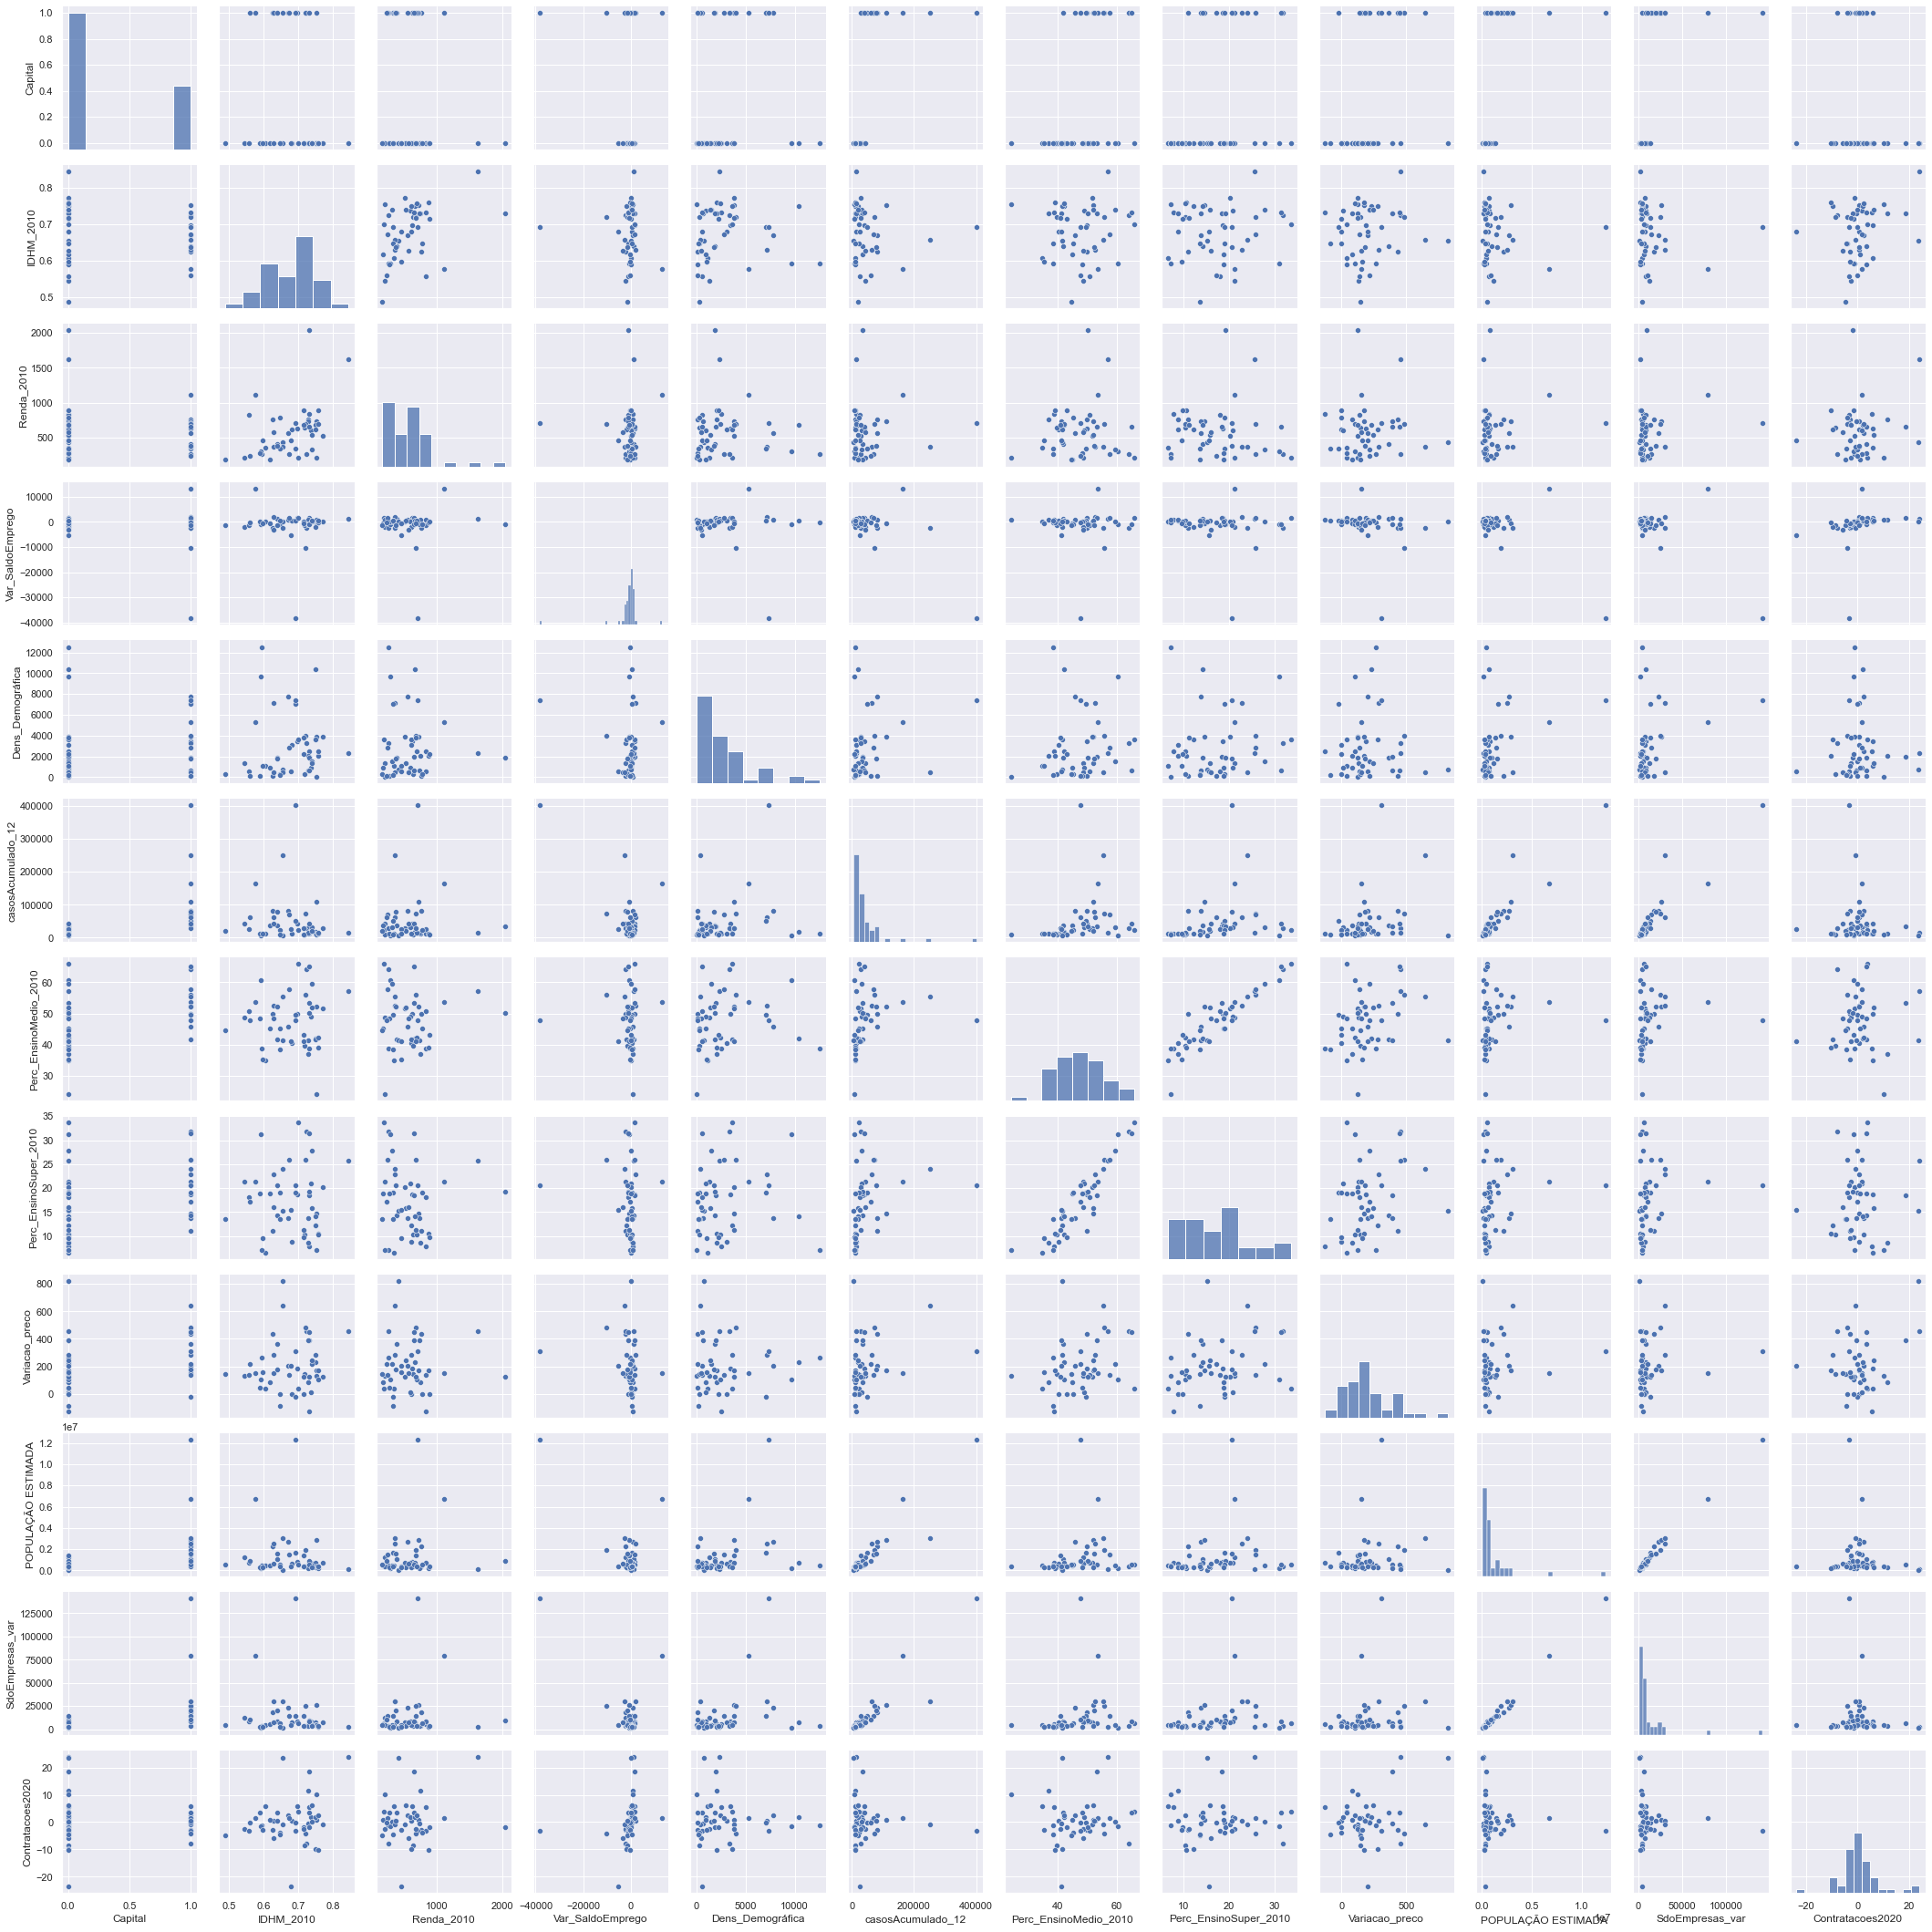

In [233]:
sns.pairplot(df_var.iloc[:,3:])

plt.show()

In [104]:
df = df_jan

### Carregas Municpios Espacial

In [105]:
# muncipios = pd.read_pickle('bases-gdrive/Dados Processados/municipios.pkl')

municipios = gpd.read_file('bases-gdrive/Shapefile/Munic_brasil/munic_brasil.shp', index_col = 0)

municipios.head()

,ID,AREA,GEOCODIGO,NOME,NOMECAPS,UF,CODUF,REGIAO,MESORREGIA,MICRORREGI,RM,POP2004,DENSDEMO,geometry
0,2,76680.43,1300201,Atalaia do Norte,ATALAIA DO NORTE,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,11023,0.14,"POLYGON ((-73.80098 -7.11146, -73.79617 -7.102..."
1,1,5474.51,1200336,Mâncio Lima,MANCIO LIMA,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,None,11883,2.17,"POLYGON ((-73.80098 -7.11146, -73.73762 -7.134..."
2,12,8832.70,1300607,Benjamin Constant,BENJAMIN CONSTANT,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,25542,2.89,"POLYGON ((-70.13532 -4.28746, -70.12815 -4.293..."
3,23,3236.87,1304062,Tabatinga,TABATINGA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,42652,13.18,"POLYGON ((-69.95428 -4.26597, -69.95329 -4.253..."
4,24,12363.85,1303700,Santo Antônio do Içá,SANTO ANTONIO DO ICA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,33421,2.70,"POLYGON ((-69.83709 -3.68623, -69.82498 -3.620..."


In [234]:
estados = gpd.read_file('BR_UF_2020/BR_UF_2020.shp')

### Juntar Dados

In [106]:
esp_df = pd.merge(
    left = municipios,
    right = df,
    left_on = 'GEOCODIGO',
    right_index = True,
    how = 'right'
)

print(esp_df.shape)
esp_df.head()

(50, 28)


,ID,AREA,GEOCODIGO,NOME,NOMECAPS,UF_x,CODUF,REGIAO_x,MESORREGIA,MICRORREGI,...,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020
949,127,11455.38,1302603,Manaus,MANAUS,AM,13,Norte,CENTRO AMAZONENSE,MANAUS,...,0.625,762.54,878.0,158.06,49.86,10.97,4611.637209,2219580,4904.0,-2.970542
121,5792,214.06,2507507,João Pessoa,JOAO PESSOA,PB,25,Nordeste,MATA PARAIBANA,JOAO PESSOA,...,0.697,627.59,41.0,3421.30,49.91,18.61,4329.077250,817511,2702.0,5.858631
84,5052,320.12,2304400,Fortaleza,FORTALEZA,CE,23,Nordeste,METROPOLITANA DE FORTALEZA,FORTALEZA,...,0.670,562.53,948.0,7786.52,45.93,13.73,5744.260562,2686612,6393.0,2.347699
621,5883,319.86,2927408,Salvador,SALVADOR,BA,29,Nordeste,METROPOLITANA DE SALVADOR,SALVADOR,...,0.753,727.33,1113.0,3859.35,52.28,14.59,5037.085869,2886698,6872.0,0.678999
146,5581,516.46,2704302,Maceió,MACEIO,AL,27,Nordeste,LESTE ALAGOANO,MACEIO,...,0.640,401.42,-427.0,1854.12,41.83,14.24,4831.409966,1025360,2205.0,3.382282


In [167]:
esp_df.drop(['MESORREGIA', 'MESORREGIA', 'NOME'], axis = 1).to_file('Shapefiles/Municipio-Jan/')

<ipython-input-167-249fb3c49f1e>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  esp_df.drop(['MESORREGIA', 'MESORREGIA', 'NOME'], axis = 1).to_file('Shapefiles/Municipio-Jan/')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 66: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/fiona/collection.py", line 165, in __init__
    self.session.start(self, **kwargs)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 66: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 6: invalid continuation byte

In [101]:
df.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020,POP2004,GEOCODIGO
949,Norte,AM,Manaus,1,0.625,762.54,878.0,158.06,49.86,10.97,4611.637209,2219580,4904.0,-2.970542,1592555,1302603
121,Nordeste,PB,João Pessoa,1,0.697,627.59,41.0,3421.30,49.91,18.61,4329.077250,817511,2702.0,5.858631,649410,2507507
84,Nordeste,CE,Fortaleza,1,0.670,562.53,948.0,7786.52,45.93,13.73,5744.260562,2686612,6393.0,2.347699,2332657,2304400
621,Nordeste,BA,Salvador,1,0.753,727.33,1113.0,3859.35,52.28,14.59,5037.085869,2886698,6872.0,0.678999,2631831,2927408
146,Nordeste,AL,Maceió,1,0.640,401.42,-427.0,1854.12,41.83,14.24,4831.409966,1025360,2205.0,3.382282,884320,2704302


### Selecionar dados para modelos

In [241]:
target = 'Preco_jan_2020'

x = df.iloc[:,3:].drop([target], axis = 1)

labels = x.columns

y = df[target]

x_y = pd.merge(x, y, left_index=True, right_index=True)

x.head()

,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,
1302603,1,0.625,762.54,878.0,158.06,49.86,10.97,2219580,4904.0,-2.970542
2507507,1,0.697,627.59,41.0,3421.30,49.91,18.61,817511,2702.0,5.858631
2304400,1,0.670,562.53,948.0,7786.52,45.93,13.73,2686612,6393.0,2.347699
2927408,1,0.753,727.33,1113.0,3859.35,52.28,14.59,2886698,6872.0,0.678999
2704302,1,0.640,401.42,-427.0,1854.12,41.83,14.24,1025360,2205.0,3.382282


### Correlações

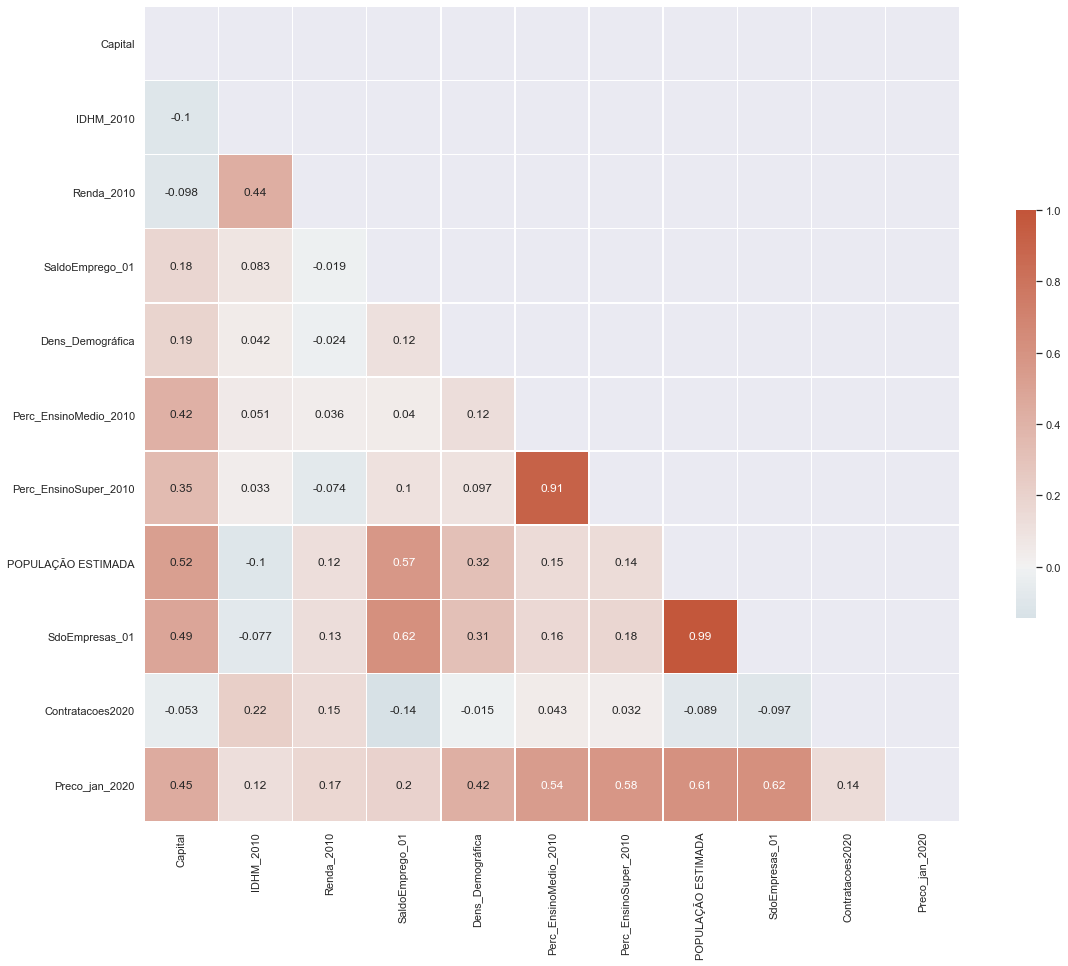

In [242]:
scripts.corr(x_y, figsize = (20,15))

### PPS index

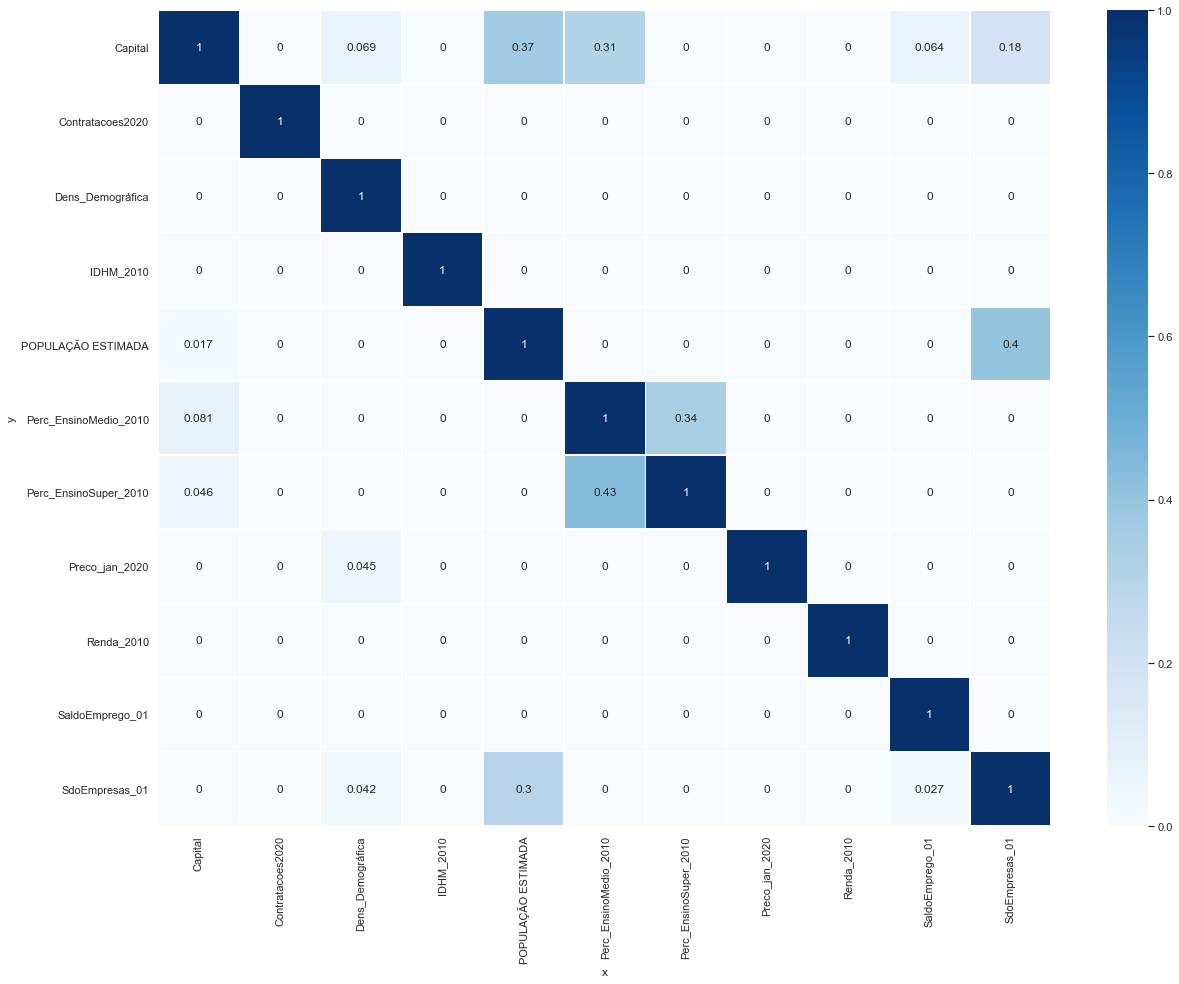

In [243]:
plt.figure(figsize=(20, 15))

matrix_df = pps.matrix(x_y)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

### Remoção de Variáveis com alta correlação

In [244]:
x = x[variables_sel]

labels = x.columns

x_y = pd.merge(x, y, left_index=True, right_index=True)


x.head()

,Renda_2010,Dens_Demográfica,Perc_EnsinoSuper_2010,SdoEmpresas_01,Contratacoes2020
MUNICIPIO_IBGE,,,,,
1302603,762.54,158.06,10.97,4904.0,-2.970542
2507507,627.59,3421.30,18.61,2702.0,5.858631
2304400,562.53,7786.52,13.73,6393.0,2.347699
2927408,727.33,3859.35,14.59,6872.0,0.678999
2704302,401.42,1854.12,14.24,2205.0,3.382282


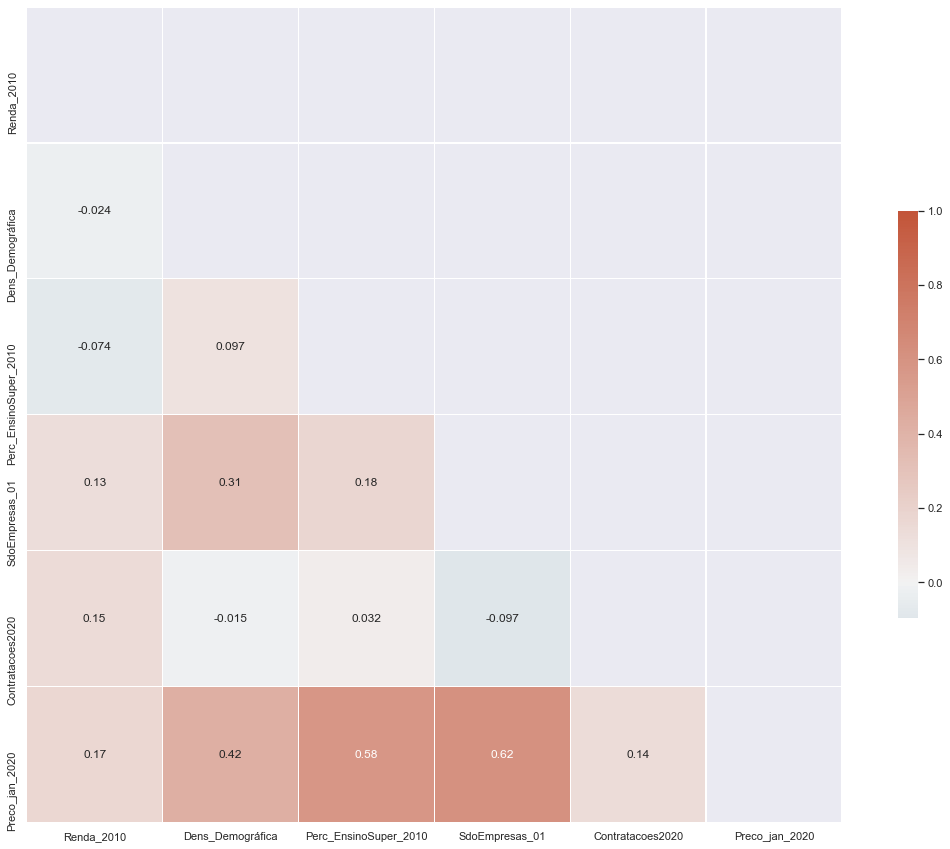

In [245]:
scripts.corr(x_y, figsize = (20,15))

#### VIF

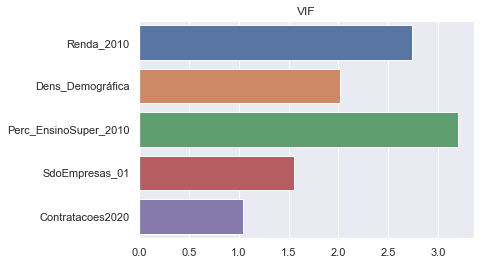

In [246]:
scripts.plot_vif(x)

#### Skewness e Kurtosis

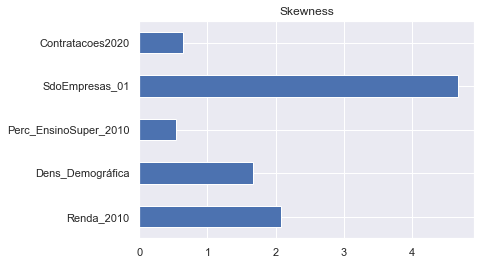

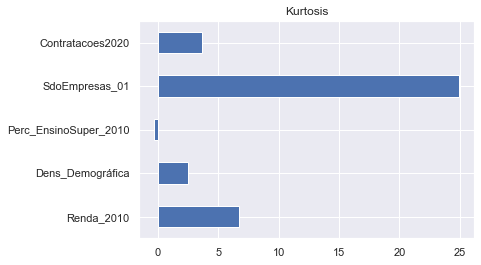

In [247]:
scripts.plot_skew_kurtosis(x)

### Realizar Normalização

In [248]:
x_norm = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index = x.index)

x_y_norm = pd.DataFrame(StandardScaler().fit_transform(x_y), columns = x_y.columns, index = x_y.index)

### Regressão Linear

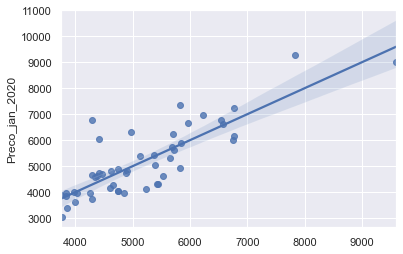

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Preco_jan_2020   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     20.40
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.76e-10
Time:                        22:34:49   Log-Likelihood:                -401.47
No. Observations:                  50   AIC:                             814.9
Df Residuals:                      44   BIC:                             826.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5173.6764    111.977     46.203      0.000    4948.002    5399.351
Renda_2010              171.0351    115.350      1.483      0.145     -61.437     403.507
Dens_Demográfica        324.6602    118.352      2.743      0.009      86.138     563.182
Perc_EnsinoSuper_2010   643.6643    114.729      5.610      0.000     412.443     874.885
SdoEmpresas_01          615.1655    121.987      5.043      0.000     369.317     861.014
Contratacoes2020        206.8972    114.303      1.810      0.077     -23.465     437.259
==============================================================================
Omnibus:                       12.784   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.634
Skew:                           1.042   Prob(JB):                      0.00109
Kurtosis:                       4.482   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
lm = sm.OLS(endog = y, exog = add_constant(x_norm))

r = lm.fit()

sns.regplot(x = r.predict(add_constant(x_norm)), y = y)

plt.show()

r.summary()

#### Stepwise Critério AIC

#### Cross Validation

Results
MSE: 782033.570
RMSE: 884.327
MAE: 649.493
R2: 0.573


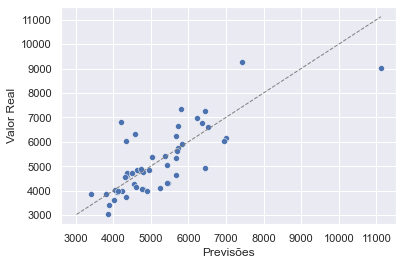

In [251]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, LinearRegression(), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

### PCA

In [252]:
pca = PCA(n_components = 2)

pca_coord = pca.fit_transform(x_y_norm)

### KMeans

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

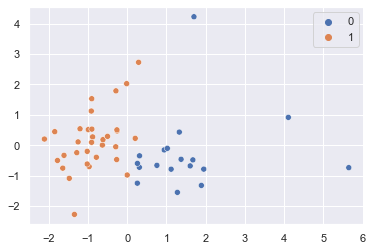

In [253]:
kmeans = KMeans(n_clusters = 2).fit_transform(x_y_norm)

sns.scatterplot(pca_coord[:,0], pca_coord[:,1], hue = kmeans.argmax(axis = 1), )

In [254]:
pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO, 'Cluster': kmeans.argmax(axis = 1)}).sort_values(by = 'Cluster')

,Cidade,Cluster
MUNICIPIO_IBGE,,
3534401,Osasco,0
4205407,Florianópolis,0
3505708,Barueri,0
3548807,São Caetano do Sul,0
3304557,Rio de Janeiro (território),0
4202008,Balneário Camboriú,0
3550308,São Paulo (território),0
3547809,Santo André,0
4106902,Curitiba,0


##### Outlier

In [255]:
df[pca_coord[:,0] > 5]

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,
3550308,Sudeste,SP,São Paulo (território),1,0.692,710.04,22311.0,7387.69,47.88,20.63,9018.976882,12325232,43795.0,-3.284015


Removendo Outliers

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


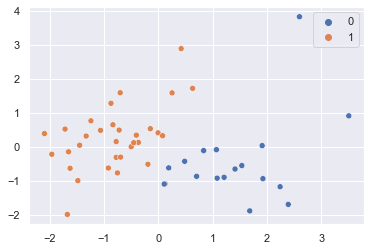

,Cidade,Cluster
MUNICIPIO_IBGE,,
3548807,São Caetano do Sul,0
4205407,Florianópolis,0
3505708,Barueri,0
3534401,Osasco,0
3304557,Rio de Janeiro (território),0
4202008,Balneário Camboriú,0
3547809,Santo André,0
4106902,Curitiba,0
3205309,Vitória,0


In [256]:
slicer = pca_coord[:,0] < 5

pca = PCA(n_components = 2)

pca_coord_new = pca.fit_transform(x_y_norm.values[slicer])

kmeans_new = KMeans(n_clusters = 2).fit_transform(x_y_norm.values[slicer])

sns.scatterplot(pca_coord_new[:,0], pca_coord_new[:,1], hue = kmeans_new.argmax(axis = 1), )

plt.show()

pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO[slicer], 'Cluster': kmeans_new.argmax(axis = 1)}).sort_values(by = 'Cluster')

### Cluster Dendograma

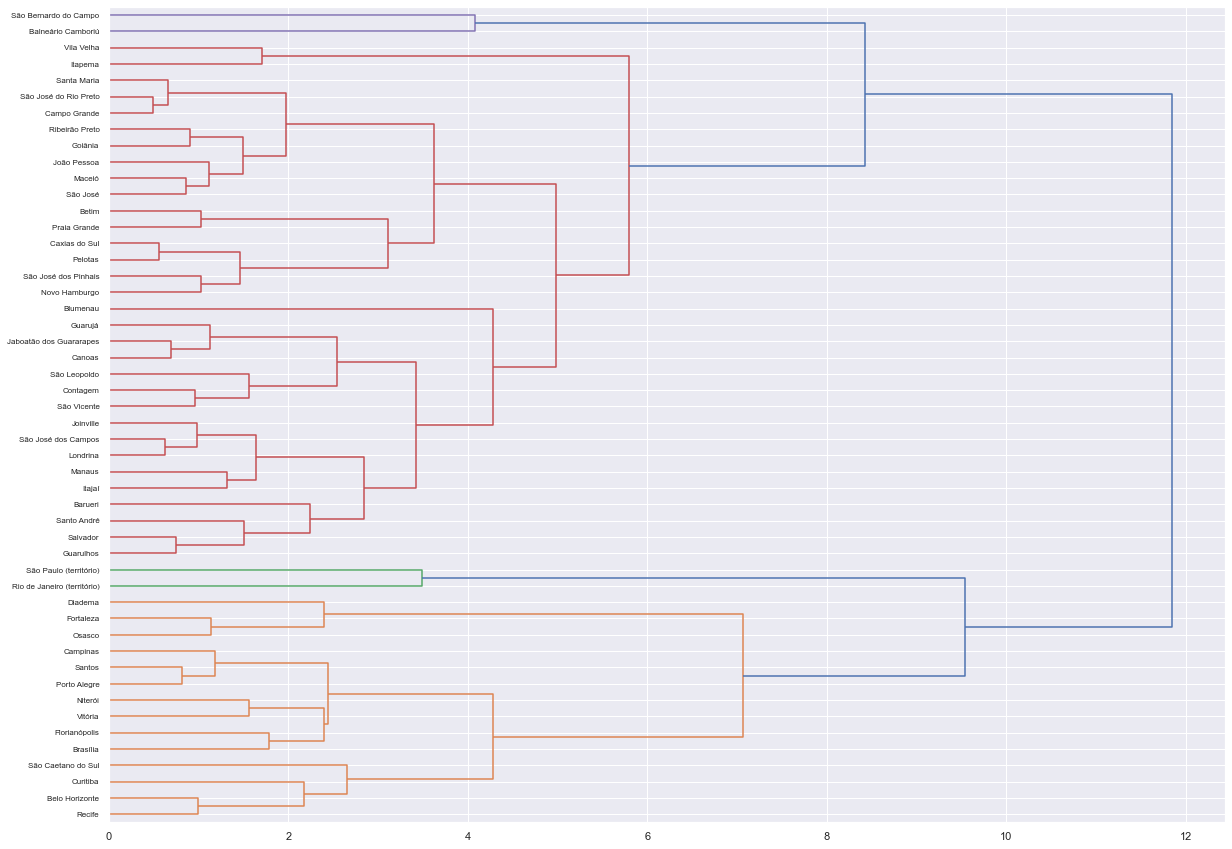

In [257]:
linked = linkage(x_y_norm.values, 'ward')

plt.figure(figsize=(20, 15))
dendrogram(
            linked,
            orientation='right',
            labels=df.MUNICIPIO_DESCRICAO.values,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

### Regressão Espacial

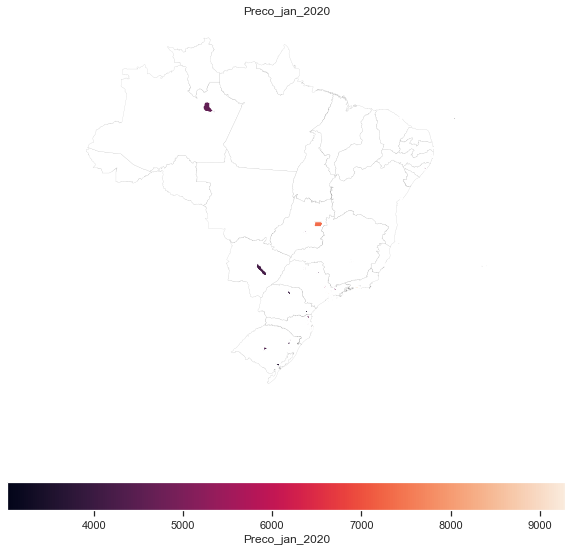

In [258]:
ax = estados.plot(figsize = (10,10),linewidth=.1, 
                     color = 'white', edgecolor = 'gray',
                 )

ax = esp_df.plot(
    column = target,
    ax = ax,
    legend = True,
    legend_kwds = {'label': target, 'orientation': "horizontal"},
)

ax.set_title(target)

ax.set_axis_off()

In [259]:
# w = libpysal.weights.Queen.from_dataframe(df, )
# w = libpysal.weights.Voronoi.from_dataframe(df.centroid, )

w = libpysal.weights.DistanceBand.from_dataframe(esp_df, 3)

w.transform = 'r'

('WARNING: ', 949, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 621, ' is an island (no neighbors)')
('WARNING: ', 1902, ' is an island (no neighbors)')


/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 4 islands with ids: 949, 84, 621, 1902.
  warnings.warn(message)


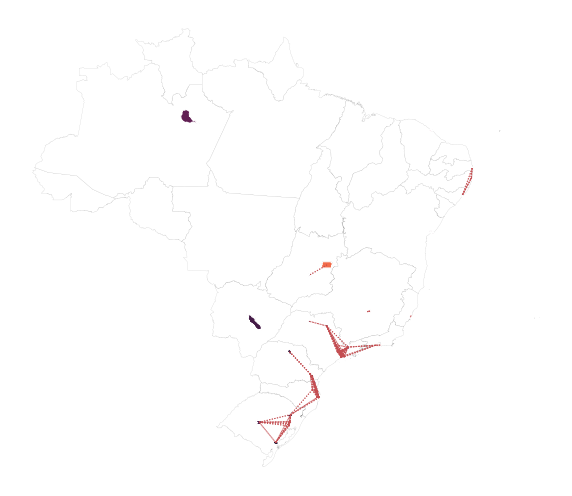

In [260]:
ax = estados.plot(figsize = (10,10),linewidth=.1, 
                     color = 'white', edgecolor = 'gray',
                 )

ax = esp_df.plot(column = target,ax = ax)

f, ax = w.plot(esp_df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''),
              )
ax.set_axis_off()

In [261]:
moran_I = {}
moran = {}
moran_local = {}

for i in x_y_norm.columns:
    
    moran[i] = esda.Moran(x_y_norm[i].values, w)
#     moran_local[i] = esda.moran.Moran_Local(x_y_norm[i].values, w)
    moran_I[i] = moran[i].I

In [262]:
(pd.Series(moran_I)
     .rename('Moran I')
     .sort_values(ascending = False)
     .to_frame()
)

,Moran I
Dens_Demográfica,0.112315
Perc_EnsinoSuper_2010,0.028926
Preco_jan_2020,-0.015323
Renda_2010,-0.038490
SdoEmpresas_01,-0.049803
Contratacoes2020,-0.156145


Dens_Demográfica


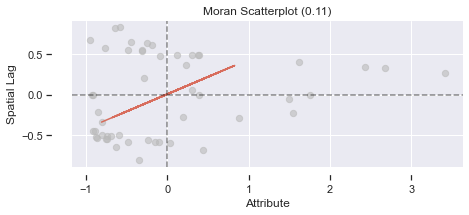

Perc_EnsinoSuper_2010


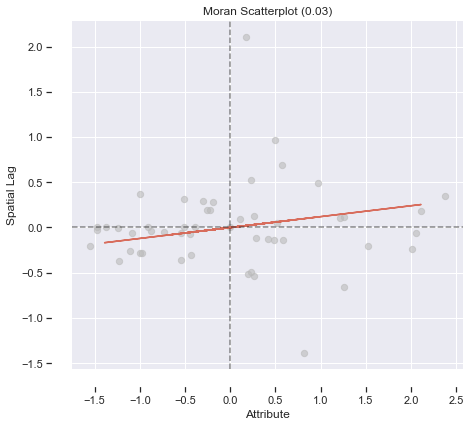

Preco_jan_2020


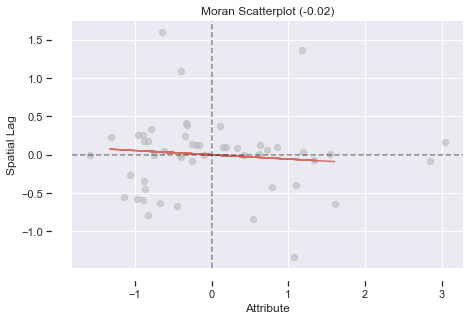

Renda_2010


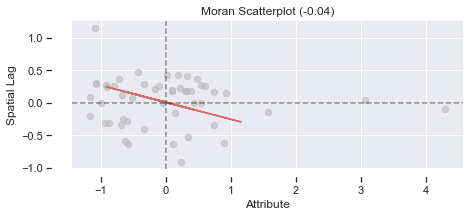

In [263]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])
    moran_scatterplot(moran[i[0]], aspect_equal=True)
    plt.show()

In [264]:
r = spreg.OLS(
        x = x_norm.values, name_x = list(labels),
        y = y.values, 
        w = w,
    )

print(r.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          50
Mean dependent var  :   5173.6764                Number of Variables   :           6
S.D. dependent var  :   1366.7274                Degrees of Freedom    :          44
R-squared           :      0.6986
Adjusted R-squared  :      0.6644
Sum squared residual:27585386.101                F-statistic           :     20.3987
Sigma-square        :  626940.593                Prob(F-statistic)     :   1.758e-10
S.E. of regression  :     791.796                Log likelihood        :    -401.466
Sigma-square ML     :  551707.722                Akaike info criterion :     814.933
S.E of regression ML:    742.7703                Schwarz criterion     :     826.405

-----------------------------------------------------------------------------

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       preco                Number of Observations:          50
Mean dependent var  :   5173.6764                Number of Variables   :           7
S.D. dependent var  :   1366.7274                Degrees of Freedom    :          43
Pseudo R-squared    :      0.6889
Spatial Pseudo R-squared:  0.6824

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    5652.8643847     947.6481739       5.9651509       0.0000000
          Renda_2010     181.3437232     111.8262992       1.6216554       0.1048772
    Dens_Demográfica     321.7000092     112.9883862       

<AxesSubplot:ylabel='Preco_jan_2020'>

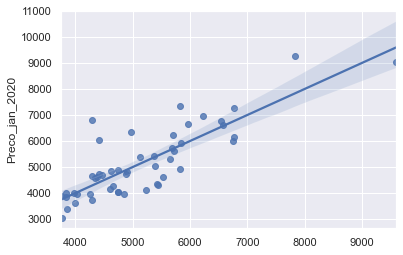

In [265]:

spatial_regression = spreg.GM_Lag(
        x = x_norm.values, name_x = list(labels),
        y = y.values, name_y = 'preco',
        w = w,
    
        
    )

print(
    spatial_regression.summary
)

sns.regplot(x = r.predy, y = y)

### Random Forests

In [266]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(y = y, X = x_norm)

RandomForestRegressor(n_estimators=200)

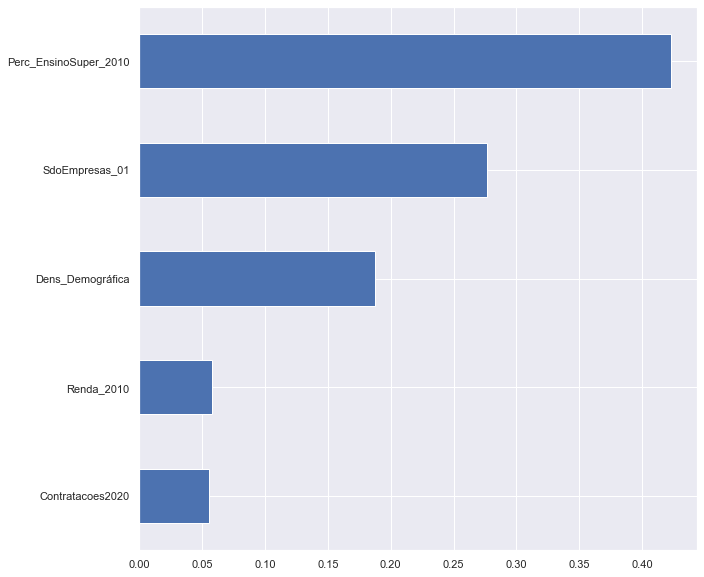

In [267]:
pd.Series(rf.feature_importances_, index = labels).sort_values().plot.barh(figsize = (10,10))

plt.show()

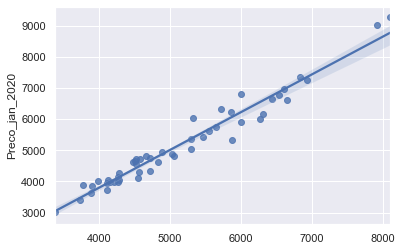

In [268]:
sns.regplot(x = rf.predict(x_norm), y = y)

plt.show()

Results
MSE: 1001906.359
RMSE: 1000.953
MAE: 722.547
R2: 0.453


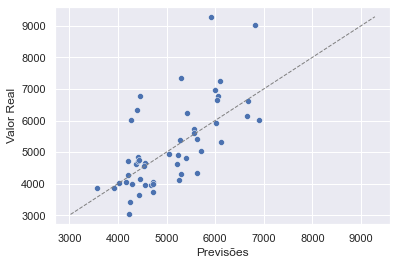

In [269]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, RandomForestRegressor(n_estimators = 50), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

#### Recursive Feature Eliminations

In [ ]:
selector_rf = RFE(rf, n_features_to_select=.5, step=1)

selector_rf = selector_rf.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_rf.ranking_, index = labels).sort_values()

### Linear Support Vector Regression

In [270]:
svr = SVR(kernel = 'linear')

svr = svr.fit(y = y, X = x_norm)

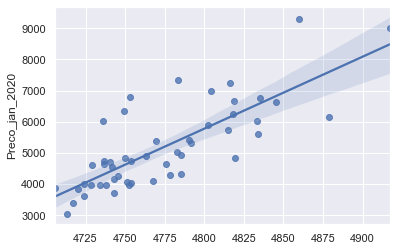

In [271]:
sns.regplot(x = svr.predict(x_norm), y = y)

plt.show()

Results
MSE: 1930447.002
RMSE: 1389.405
MAE: 1030.192
R2: -0.055


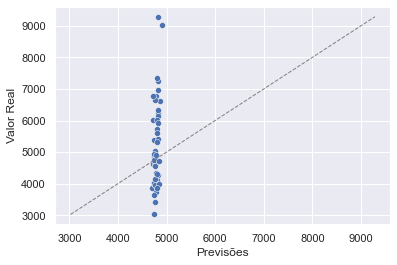

In [272]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, svr, folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

In [ ]:
selector_svr = RFE(SVR(kernel='linear'), n_features_to_select=.5, step=1)

selector_svr = selector_svr.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_svr.ranking_, index = labels).sort_values()

In [ ]:
pd.DataFrame(
    {
    'RF Feature Importance': np.argsort(-rf.feature_importances_),
    'RF RFE': selector_rf.ranking_,
    'SVR RFE': selector_svr.ranking_
},
    index = labels
)